<a href="https://colab.research.google.com/github/AndresOscar/4100901-Mid_Term_Exam/blob/main/Estimation_PSD_and_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Filter signal and estimation of PSD using H(s)

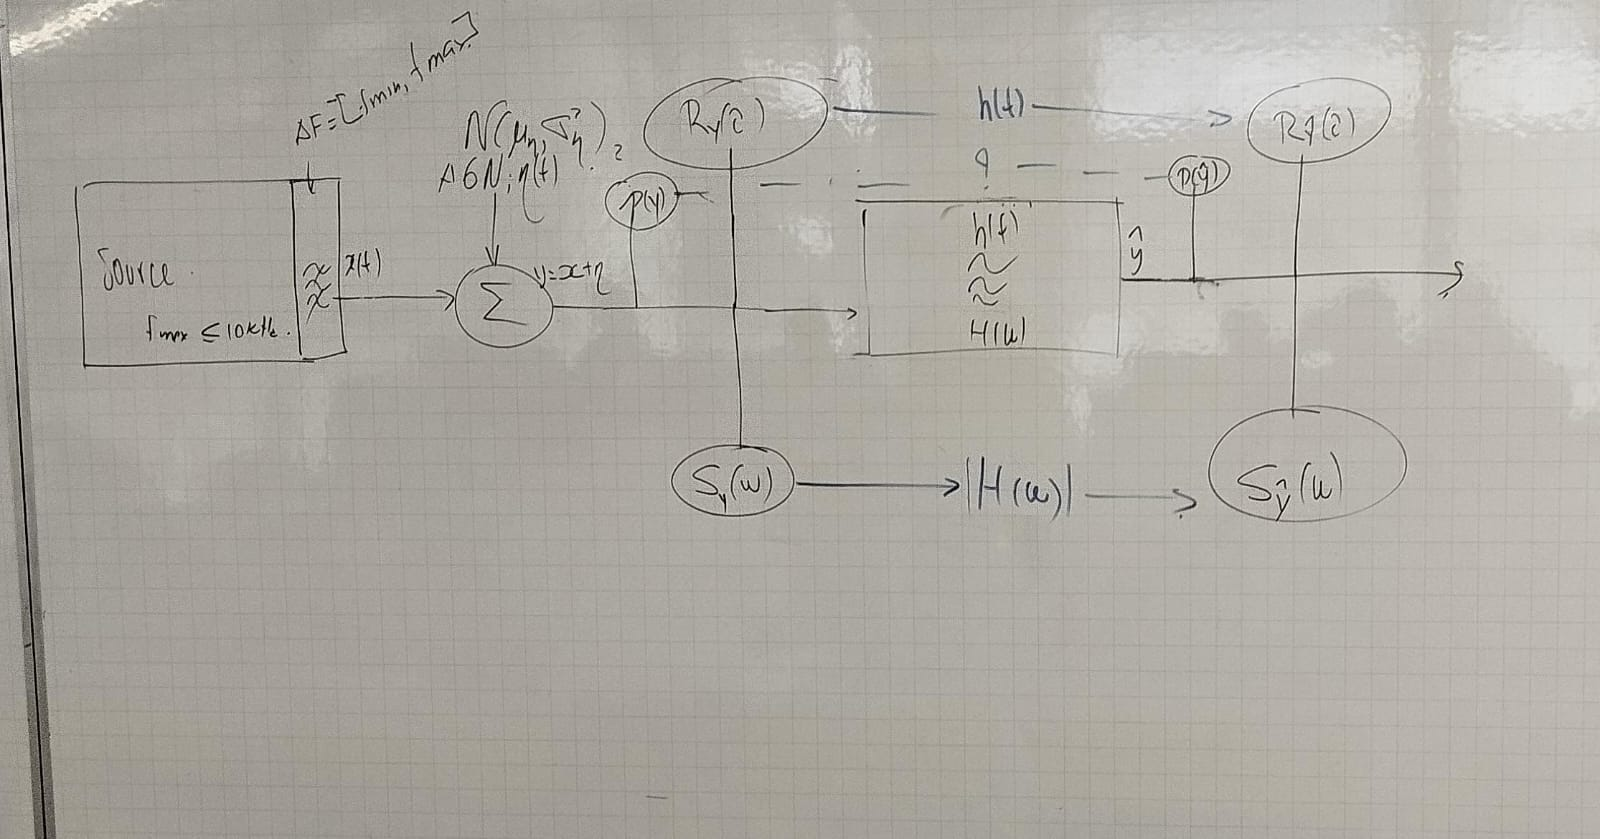

# 🎯 Sistema LTI y su efecto en el dominio de la frecuencia

Supón un sistema **lineal e invariante en el tiempo (LTI)** con función de transferencia $H(f)$ o $H(j\omega)$, y una entrada $x(t)$, que tiene transformada de Fourier $X(f)$.

---

## 🧩 En el dominio de la frecuencia:

$$
Y(f) = H(f) \cdot X(f)
$$

**Donde:**
- $X(f)$: espectro de la entrada  
- $Y(f)$: espectro de la salida  
- $H(f)$: función de transferencia (respuesta en frecuencia del sistema)

Esto es consecuencia de la **propiedad de convolución**:

$$
y(t) = h(t) * x(t) \quad \Rightarrow \quad Y(f) = H(f) \cdot X(f)
$$

---

## 📊 Señales aleatorias y densidad espectral de potencia

Si $x(t)$ es una **señal aleatoria estacionaria**, su espectro no es determinista, pero sí podemos definir su **PSD** como:

$$
S_x(f) = \lim_{T \to \infty} \frac{1}{T} |X_T(f)|^2
$$

Donde $X_T(f)$ es la Transformada de Fourier de $x(t)$ truncada a tiempo $T$.

Entonces, si el sistema es LTI:

$$
S_y(f) = |H(f)|^2 \cdot S_x(f)
$$

Esto vale para **todo tipo de señal aleatoria o determinista con energía limitada**, y es la **relación general entre la respuesta en frecuencia del sistema y la densidad espectral de potencia**.


/usr/local/lib/python3.11/dist-packages/scipy/signal/_lti_conversion.py:74: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  num, den = normalize(num, den)   # Strips zeros, checks arrays


Filtro pasa bandas RC: f0 = 100 Hz, Q = 3, R = 1000.0, C = 1.59e-06 F


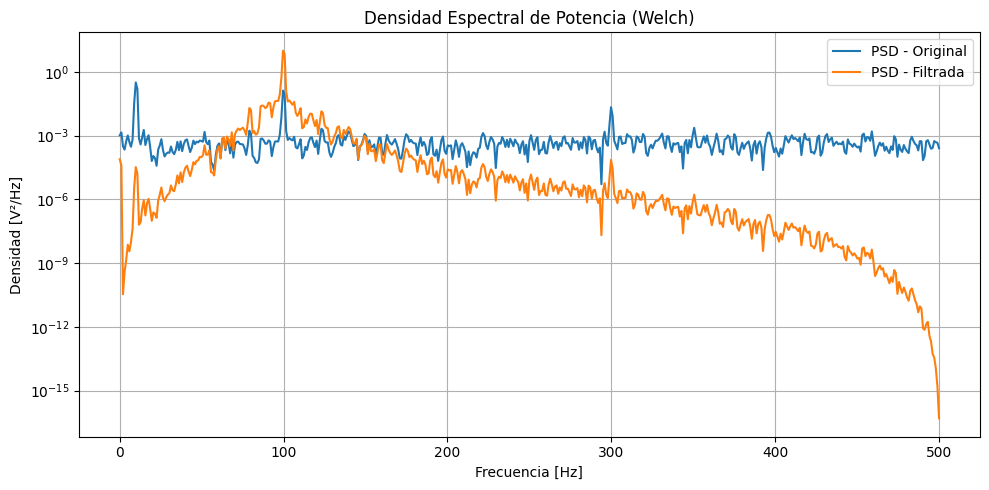

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def generar_senal_compuesta(t, freqs, amplitudes, ruido_std=0.5, seed=0):
    """Genera señal cosenoidal compuesta con ruido blanco"""
    x = sum(a * np.cos(2 * np.pi * f * t) for f, a in zip(freqs, amplitudes))
    np.random.seed(seed)
    ruido = np.random.normal(0, ruido_std, len(t))
    return x + ruido, x

def crear_filtro_rc(fc, fs, orden=1, tipo='low', R=1e3):
    """Filtro RC pasa bajas o pasa altas"""
    assert orden in [1, 2], "Solo se permite orden 1 o 2"
    assert tipo in ['low', 'high'], "Tipo debe ser 'low' o 'high'"
    C = 1 / (2 * np.pi * fc * R)

    if tipo == 'low':
        if orden == 1:
            num = [1]
            den = [R*C, 1]
        else:
            num = [1]
            den = [R**2 * C**2, 2*R*C, 1]
    elif tipo == 'high':
        if orden == 1:
            num = [R*C, 0]
            den = [R*C, 1]
        else:
            num = [R**2 * C**2, 0, 0]
            den = [R**2 * C**2, 2*R*C, 1]

    system_discrete = signal.cont2discrete((num, den), dt=1/fs, method='bilinear')
    b, a = system_discrete[0:2]
    return b.flatten(), a.flatten(), R, C

def crear_filtro_rc_pasabandas(f0, fs, orden=2, Q=1, R=1e3):
    """Filtro RC pasa bandas de primer o segundo orden"""
    assert orden in [1, 2], "Solo se admite orden 1 o 2"
    w0 = 2 * np.pi * f0
    C = 1 / (2 * np.pi * f0 * R * np.sqrt(1))

    if orden == 1:
        num = [0, R*C, 0]
        den = [R*C, 1]
        num = signal.lp2bp(num, den, wo=w0)[0]
    else:
        num = [0, R*C, 0]
        den = [R**2 * C**2, R*C / Q, 1]

    system_discrete = signal.cont2discrete((num, den), dt=1/fs, method='bilinear')
    b, a = system_discrete[0:2]
    return b.flatten(), a.flatten(), R, C

def aplicar_filtro(b, a, x):
    return signal.filtfilt(b, a, x)

def graficar_psd(x1, x2, fs, label1="Original", label2="Filtrada", nperseg=1024):
    f, Pxx1 = signal.welch(x1, fs, nperseg=nperseg)
    _, Pxx2 = signal.welch(x2, fs, nperseg=nperseg)
    plt.figure(figsize=(10, 5))
    plt.semilogy(f, Pxx1, label=f"PSD - {label1}")
    plt.semilogy(f, Pxx2, label=f"PSD - {label2}")
    plt.title("Densidad Espectral de Potencia (Welch)")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Densidad [V²/Hz]")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

def main():
    fs = 1000                 # Frecuencia de muestreo [Hz]
    f0 = 100                  # Frecuencia central del filtro pasa bandas
    Q = 3                     # Factor de calidad
    orden = 2                 # Orden del filtro
    t = np.arange(0, 2, 1/fs)
    freqs = [10, 100, 300]
    amplitudes = [1, 0.7, 0.3]

    x_ruidosa, x_sin_ruido = generar_senal_compuesta(t, freqs, amplitudes)

    # Crear filtro pasa bandas
    b, a, R, C = crear_filtro_rc_pasabandas(f0, fs, orden=orden, Q=Q)
    print(f"Filtro pasa bandas RC: f0 = {f0} Hz, Q = {Q}, R = {R}, C = {C:.2e} F")

    x_filtrada = aplicar_filtro(b, a, x_ruidosa)

    # Mostrar PSD
    graficar_psd(x_ruidosa, x_filtrada, fs)

if __name__ == "__main__":
    main()


/usr/local/lib/python3.11/dist-packages/scipy/signal/_ltisys.py:599: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)
/usr/local/lib/python3.11/dist-packages/scipy/signal/_lti_conversion.py:74: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  num, den = normalize(num, den)   # Strips zeros, checks arrays


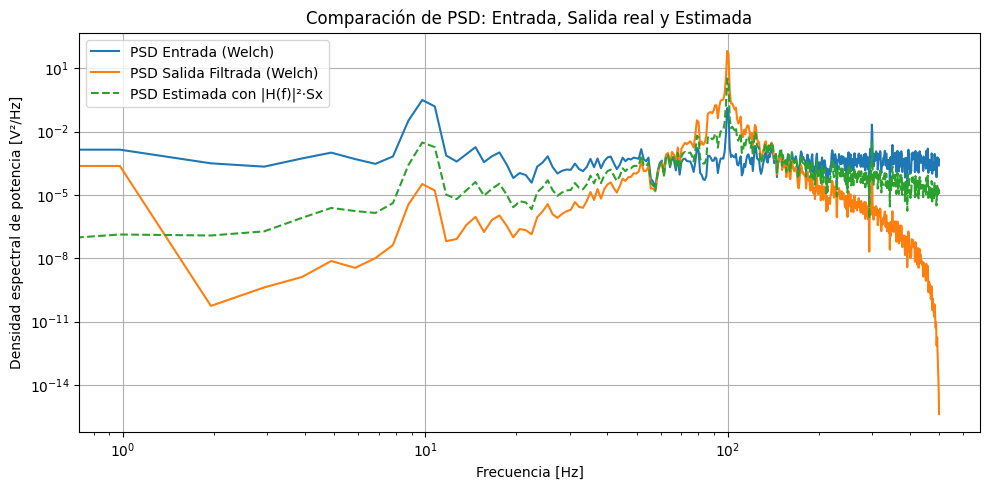

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Ya tienes esta función:
def crear_filtro_rc_pasabandas(f0, fs, orden=2, Q=1, R=1e3):
    assert orden in [1, 2], "Solo se admite orden 1 o 2"
    w0 = 2 * np.pi * f0
    C = 1 / (2 * np.pi * f0 * R * np.sqrt(1))

    if orden == 1:
        num = [0, R*C, 0]
        den = [R*C, 1]
        num = signal.lp2bp(num, den, wo=w0)[0]
    else:
        num = [0, R*C, 0]
        den = [R**2 * C**2, R*C / Q, 1]

    # Para análisis en continuo
    system = signal.TransferFunction(num, den)
    # Para implementación digital
    system_d = signal.cont2discrete((num, den), dt=1/fs, method='bilinear')
    b, a = system_d[0:2]
    return b.flatten(), a.flatten(), system, R, C

# Generar señal
def generar_senal_compuesta(t, freqs, amplitudes, ruido_std=0.5, seed=0):
    x = sum(a * np.cos(2 * np.pi * f * t) for f, a in zip(freqs, amplitudes))
    np.random.seed(seed)
    ruido = np.random.normal(0, ruido_std, len(t))
    return x + ruido

# Aplicar filtro
def aplicar_filtro(b, a, x):
    return signal.filtfilt(b, a, x)

# Estimar PSD con Welch
def estimar_psd_welch(x, fs, nperseg=1024):
    f, Pxx = signal.welch(x, fs, nperseg=nperseg)
    return f, Pxx

# Estimar PSD salida con función de transferencia
def estimar_psd_por_transferencia(f, Sx, system):
    w = 2 * np.pi * f
    _, H = signal.freqresp(system, w)
    return np.abs(H)**2 * Sx

# Graficar comparación de PSDs
def graficar_psd_comparativa(f, Sx, Sy_teo, Sy_real):
    plt.figure(figsize=(10, 5))
    plt.loglog(f, Sx, label="PSD Entrada (Welch)")
    plt.loglog(f, Sy_real, label="PSD Salida Filtrada (Welch)")
    plt.loglog(f, Sy_teo, '--', label="PSD Estimada con |H(f)|²·Sx")
    plt.title("Comparación de PSD: Entrada, Salida real y Estimada")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Densidad espectral de potencia [V²/Hz]")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# MAIN
def main():
    fs = 1000  # Frecuencia de muestreo
    t = np.arange(0, 2, 1/fs)
    freqs = [10, 100, 300]
    amplitudes = [1.0, 0.7, 0.3]

    # 1. Generar señal
    x = generar_senal_compuesta(t, freqs, amplitudes)

    # 2. Crear filtro pasa bandas RC
    f0 = 100   # Frecuencia central del filtro
    Q = 5
    orden = 2
    b, a, system, R, C = crear_filtro_rc_pasabandas(f0, fs, orden=orden, Q=Q)

    # 3. Aplicar el filtro
    x_filtrada = aplicar_filtro(b, a, x)

    # 4. Estimar PSDs con Welch
    f, Sx = estimar_psd_welch(x, fs)
    _, Sy_real = estimar_psd_welch(x_filtrada, fs)

    # 5. Estimar PSD de salida por función de transferencia
    Sy_teo = estimar_psd_por_transferencia(f, Sx, system)

    # 6. Mostrar resultados
    graficar_psd_comparativa(f, Sx, Sy_teo, Sy_real)

if __name__ == "__main__":
    main()


## 📄 Fórmula:

$$
R_{yy}(\tau) = \left( h * R_{xx} * h^* \right)(\tau)
$$

**Donde:**
- $R_{yy}(\tau)$: autocorrelación de la **salida** del sistema.
- $R_{xx}(\tau)$: autocorrelación de la **entrada** al sistema.
- $h(t)$: **respuesta al impulso** del sistema.
- $h^*(-t)$: conjugada e invertida de $h(t)$ (simétrica conjugada).
- El símbolo $*$ denota **convolución**.

---

### 1. Supón una señal aleatoria $x(t)$ que pasa por un sistema LTI:

$$
y(t) = h(t) * x(t)
$$

---

### 2. Queremos calcular la autocorrelación de la salida:

$$
R_{yy}(\tau) = \mathbb{E}[y(t) y(t + \tau)]
$$

---

### 3. Sustituimos $y(t) = h * x$:

$$
R_{yy}(\tau) = \mathbb{E}[(h * x)(t) \cdot (h * x)(t + \tau)]
$$

Como la convolución es lineal:

$$
= \mathbb{E} \left[ \int h(\lambda)x(t - \lambda)d\lambda \cdot \int h(\mu)x(t + \tau - \mu)d\mu \right]
$$

---

### 4. Se reordenan las integrales y la esperanza (usando propiedades de proceso estacionario):

$$
= \int\!\!\!\int h(\lambda)h(\mu)\mathbb{E}[x(t - \lambda)x(t + \tau - \mu)] d\lambda d\mu
$$

La esperanza es la autocorrelación de entrada:

$$
= \int\!\!\!\int h(\lambda)h(\mu)R_{xx}(\tau + \lambda - \mu) d\lambda d\mu
$$

---

### 5. Esta expresión equivale a una **convolución doble**:

$$
R_{yy}(\tau) = \left(h * R_{xx} * h^*\right)(\tau)
$$

Donde $h^*(\tau) = h(-\tau)^*$, que representa la **versión invertida y conjugada** de $h(t)$.

---

## 🧠 Intuición de esta fórmula

- El sistema **moldea la correlación** de la señal.
- Las **frecuencias** donde el sistema tiene ganancia → se **mantienen las correlaciones**.
- Las **frecuencias atenuadas** → **pierden coherencia temporal**.

---

## 🌀 Relación con la PSD

Aplicando **Transformada de Fourier** a ambos lados:

$$
\mathcal{F}\{R_{yy}(\tau)\} = S_y(f), \quad \mathcal{F}\{R_{xx}(\tau)\} = S_x(f)
$$

Y como la convolución en el tiempo es **multiplicación en frecuencia**:

$$
S_y(f) = |H(f)|^2 \cdot S_x(f)
$$


/usr/local/lib/python3.11/dist-packages/scipy/signal/_ltisys.py:599: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)
/usr/local/lib/python3.11/dist-packages/scipy/signal/_lti_conversion.py:74: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  num, den = normalize(num, den)   # Strips zeros, checks arrays


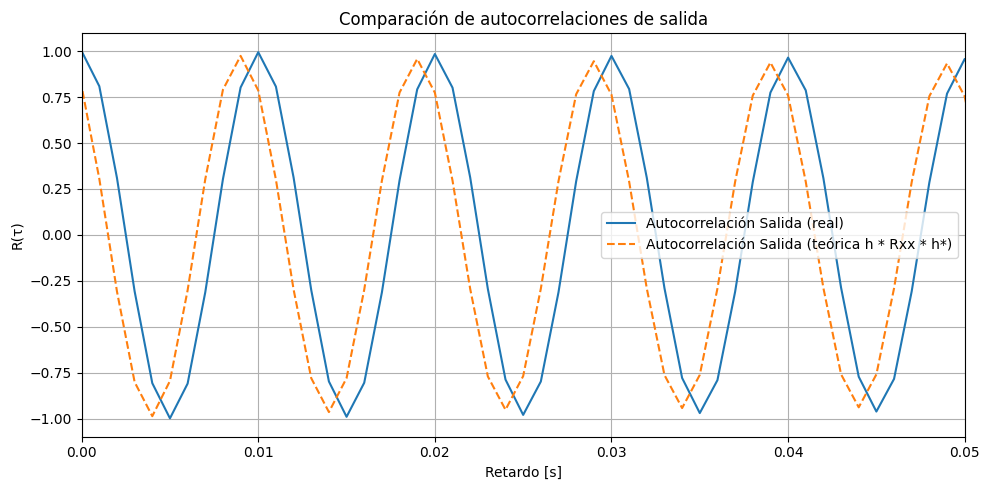

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Función original del filtro pasa bandas
def crear_filtro_rc_pasabandas(f0, fs, orden=2, Q=1, R=1e3):
    assert orden in [1, 2], "Solo orden 1 o 2 permitido"
    w0 = 2 * np.pi * f0
    C = 1 / (2 * np.pi * f0 * R * np.sqrt(1))

    if orden == 1:
        num = [0, R*C, 0]
        den = [R*C, 1]
        num = signal.lp2bp(num, den, wo=w0)[0]
    else:
        num = [0, R*C, 0]
        den = [R**2 * C**2, R*C / Q, 1]

    system = signal.TransferFunction(num, den)
    system_d = signal.cont2discrete((num, den), dt=1/fs, method='bilinear')
    b, a = system_d[0:2]
    return b.flatten(), a.flatten(), system

# Señal cosenoidal + ruido
def generar_senal(t, freqs, amps, ruido_std=0.5, seed=0):
    np.random.seed(seed)
    x = sum(a * np.cos(2 * np.pi * f * t) for f, a in zip(freqs, amps))
    ruido = np.random.normal(0, ruido_std, len(t))
    return x + ruido

# Autocorrelación normalizada
def autocorrelacion(x):
    corr = np.correlate(x, x, mode='full')
    corr /= np.max(np.abs(corr))  # Normalizar
    lags = np.arange(-len(x) + 1, len(x))
    return lags, corr

# Respuesta al impulso del filtro (tiempo discreto)
def respuesta_impulso(b, a, N=512):
    imp = np.zeros(N)
    imp[0] = 1
    return signal.lfilter(b, a, imp)

# Convolución triple: h * Rxx * h*
def autocorrelacion_teorica_salida(Rxx, h):
    h_conj_inv = np.conj(h[::-1])  # h^*(-n)
    R1 = np.convolve(Rxx, h, mode='full')
    Ryy_teo = np.convolve(R1, h_conj_inv, mode='full')
    return Ryy_teo

# Graficar comparación
def graficar_autocorrelacion(lags_teo, R_teo, lags_real, R_real, fs):
    t_teo = lags_teo / fs
    t_real = lags_real / fs

    plt.figure(figsize=(10,5))
    plt.plot(t_real, R_real, label="Autocorrelación Salida (real)")
    plt.plot(t_teo, R_teo / np.max(R_teo), '--', label="Autocorrelación Salida (teórica h * Rxx * h*)")
    plt.xlim(0,0.05)
    plt.title("Comparación de autocorrelaciones de salida")
    plt.xlabel("Retardo [s]")
    plt.ylabel("R(τ)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# MAIN
def main():
    # Parámetros
    fs = 1000
    t = np.arange(0, 2, 1/fs)
    freqs = [10, 100, 300]
    amps = [1.0, 0.7, 0.3]

    # Generar señal ruidosa
    x = generar_senal(t, freqs, amps)

    # Autocorrelación entrada
    lags_in, Rxx = autocorrelacion(x)

    # Crear filtro
    f0 = 100
    Q = 5
    b, a, _ = crear_filtro_rc_pasabandas(f0, fs, orden=2, Q=Q)

    # Respuesta al impulso
    h = respuesta_impulso(b, a, N=512)

    # Aplicar filtro a la señal
    y = signal.filtfilt(b, a, x)

    # Autocorrelación real de salida
    lags_out, Ryy_real = autocorrelacion(y)

    # Autocorrelación estimada por convolución h * Rxx * h*
    Ryy_teo = autocorrelacion_teorica_salida(Rxx, h)
    lags_teo = np.arange(-len(Ryy_teo)//2, len(Ryy_teo)//2)

    # Graficar comparación
    graficar_autocorrelacion(lags_teo, Ryy_teo, lags_out, Ryy_real, fs)

if __name__ == "__main__":
    main()
